<a href="https://colab.research.google.com/github/RamidNazarov/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (1).csv')
train_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
# Getting broad overview of the data

train_data.info()
print('\n\n\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcla

In [4]:
# Total number null values in each column

train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# percentage of null values in cabin of training data

print((train_data['Cabin'].isna().sum()/len(train_data['Cabin']))*100)

77.10437710437711


In [7]:
# Total number of null values in age

pd.isna(train_data['Age']).sum()

177

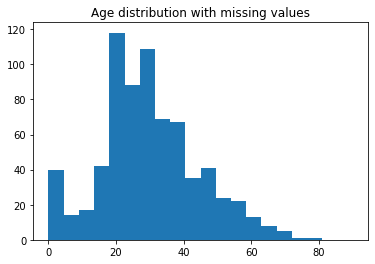

In [8]:
# Distribution of age

plt.hist(train_data['Age'], bins=20, range=(0,90))
plt.title('Age distribution with missing values')
plt.show()

In [9]:
# Filling all the missing values in age column with median age

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Conferming if any null in age

train_data['Age'].isna().sum()

0

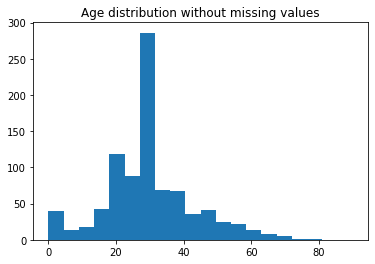

In [10]:
# Age distribution after adjusting the column with median age

plt.hist(train_data['Age'], bins=20, range=(0,90))
plt.title('Age distribution without missing values')
plt.show()


In [11]:
# How many passenger have survived

# total_passanger is number of passenger in training data set

total_passenger = train_data['Survived'].count()

# survived_passenger is the count of passenger who have survived in training data set
# since the code for survival is 1, its sum will give the required number

survived_passenger = train_data['Survived'].sum()

# percentage of passengers survived

percentage_survived = (survived_passenger/total_passenger)
print('percentage_survial : ', str(percentage_survived*100))

percentage_survial :  38.38383838383838


In [12]:
# Pclass vs Survived

groupby_Pclass = train_data[['Survived', 'Pclass']].groupby(['Pclass'], as_index=False)
print(groupby_Pclass.mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


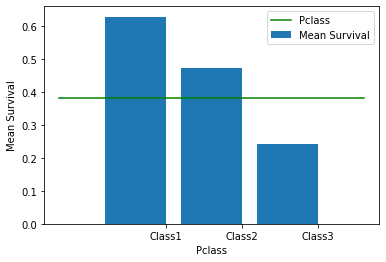

In [13]:
# Creating a bar chart to see the avg survival across Pclass

y1 = groupby_Pclass['Survived'].get_group(1).mean()
y2 = groupby_Pclass['Survived'].get_group(2).mean()
y3 = groupby_Pclass['Survived'].get_group(3).mean()

x = [1,2,3]
y = [y1, y2, y3]

plt.bar(x,y)
plt.xticks([1.4, 2.4, 3.4], ['Class1', 'Class2', 'Class3'])
plt.ylabel('Mean Survival')
plt.xlabel('Pclass')

plt.plot((0,4), (percentage_survived,percentage_survived), color = 'green')

plt.legend(labels = ['Pclass','Mean Survival'])

#plt.title('Survival mean agains Pclass')
plt.show()

In [14]:
# Sex vs Survived

groupby_sex = train_data[['Survived', 'Sex']].groupby(['Sex'], as_index = False)
print(groupby_sex.mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


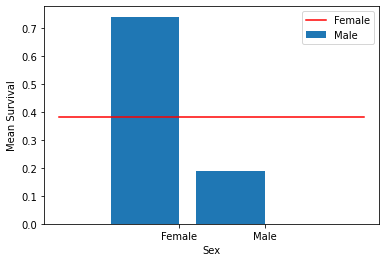

In [15]:
# Plotting bar chart for avg survival as per sex

y1 = groupby_sex['Survived'].get_group('female').mean()
y2 = groupby_sex['Survived'].get_group('male').mean()

x=[1,2]
y=[y1,y2]

plt.bar(x,y)
plt.xticks([1.4, 2.4], ['Female', 'Male'])
plt.ylabel('Mean Survival')
plt.xlabel('Sex')

plt.plot((0,3.55), (percentage_survived, percentage_survived), color='red')

plt.legend(labels = ['Female', 'Male'])

# plt.title('Survival mean agains sex')
plt.show()

In [16]:
# Age vs Survived

groupby_age = train_data[['Survived', 'Age']].groupby(['Survived'], as_index=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


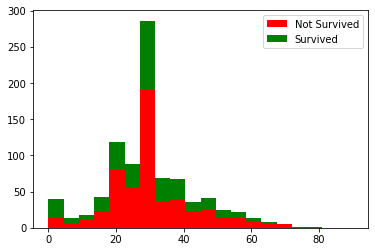

In [19]:
# Stacked histogram

x1 = groupby_age['Age'].get_group(0)
x2 = groupby_age['Age'].get_group(1)
plt.hist([x1,x2], stacked = True, bins = 20, range = (0,90), color = ['red', 'green'])
plt.legend(labels = ['Not Survived', 'Survived']);

plt.show();

In [24]:
# bins = [0, 16, 35, 60, 90]
# group_names = ['Kid', 'Young', 'Adult', 'Old']
age_bins = [0, 16, 35, 60, 90]
age_group = [0, 1, 2, 3]
train_data['Age_group'] = pd.cut(train_data['Age'], age_bins, labels=age_group)
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [19]:
grouped_age = train_data[['Survived', 'Age_group']].groupby(['Age_group'])
grouped_age['Survived'].mean()

Age_group
0    0.550000
1    0.355401
2    0.400000
3    0.227273
Name: Survived, dtype: float64

In [20]:
# Family size vs Survived

# we are going to create a column named family size in data 

train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [21]:
groupby_family = train_data[['Survived', 'Family_Size']].groupby(['Family_Size'], as_index=False)
groupby_family['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [22]:
# bins = [0, 1, 4, 11]
# group_names = ['Alone', 'Small', 'Big']

family_bins = [0, 1, 4, 11]
family_group = [0, 1, 2]
train_data['Family_group'] = pd.cut(train_data['Family_Size'], family_bins, labels = family_group)
train_data['Family_group'].astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_Size,Family_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0


In [23]:
grouped_family = train_data[['Survived', 'Family_group']].groupby(['Family_group'])
grouped_family['Survived'].mean()

Family_group
0    0.303538
1    0.578767
2    0.161290
Name: Survived, dtype: float64

In [24]:
# Fair vs Survived

groupby_fare = train_data[['Survived', 'Fare']].groupby(['Survived'])
train_data['Fare'].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

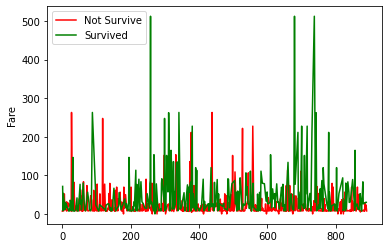

In [25]:
y1 = groupby_fare['Fare'].get_group(0)
y2 = groupby_fare['Fare'].get_group(1)

# Plot of fare of people who didn't survive
plt.plot(y1, color = 'red', label = 'Not Survive')

# plot of Fare of people who survived
plt.plot(y2, color = 'green', label = 'Survived')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [28]:
# Lets dig dipper

train_data['Quartile_fare'] = pd.qcut(train_data['Fare'], q=4)
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Quartile_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,"(14.454, 31.0]"


In [27]:
groupby_quartile = train_data[['Survived', 'Quartile_fare']].groupby(['Quartile_fare'], as_index = False)
groupby_quartile.mean()

,Quartile_fare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_Size,Family_group,Quartile_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,"(7.91, 14.454]"


In [29]:
train_data.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_group          0
Family_Size        0
Family_group       0
Quartile_fare      0
dtype: int64

In [30]:
drop_columns = ['PassengerId', 'Name', 'Age', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Family_Size', 'Quartile_fare']
train_data.drop(drop_columns, axis = 1, inplace=True)

In [31]:
train_data.head()

,Survived,Pclass,Sex,Fare,Age_group,Family_group
0,0,3,male,7.2500,1,1
1,1,1,female,71.2833,2,1
2,1,3,female,7.9250,1,0
3,1,1,female,53.1000,1,1
4,0,3,male,8.0500,1,0


In [32]:
# Mapping Sex
train_data['Sex'] = train_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping Fare
train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
train_data.loc[ train_data['Fare'] > 31, 'Fare']  = 3
train_data['Fare'] = train_data['Fare'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Fare,Age_group,Family_group
0,0,3,1,0,1,1
1,1,1,0,3,2,1
2,1,3,0,1,1,0
3,1,1,0,3,1,1
4,0,3,1,1,1,0


In [33]:
train_data.isna().sum()

Survived        0
Pclass          0
Sex             0
Fare            0
Age_group       0
Family_group    0
dtype: int64

In [34]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
# Filling missing fare

test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)
test_data['Fare'].isna().sum()

0

In [36]:
# With our experience we already know which columns need to be added as which one are going to be removed

# Creating Age_group column
test_data['Age_group'] = pd.cut(test_data['Age'], age_bins, labels = age_group)
test_data['Age_group'].astype(int)

# Creating Family_Size column
test_data['Family_Size'] = test_data['Parch'] + test_data['SibSp'] + 1

# Creating Family_group column
test_data['Family_group'] = pd.cut(test_data['Family_Size'], family_bins, labels = family_group)
test_data['Family_group'].astype(int)

# Mapping Sex
test_data['Sex'] = test_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
# Mapping Fare
test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare'] = 2
test_data.loc[ test_data['Fare'] > 31, 'Fare'] = 3
test_data['Fare'] = test_data['Fare'].astype(int)

# Dropping columns
drop_column = ['Name', 'Age', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Family_Size']
test_data.drop(drop_column, axis = 1, inplace = True)

In [37]:
test_data.head()

,PassengerId,Pclass,Sex,Fare,Age_group,Family_group
0,892,3,1,0,1,0
1,893,3,0,0,2,1
2,894,2,1,1,3,0
3,895,3,1,1,1,0
4,896,3,0,1,1,1


In [38]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Fare            0
Age_group       0
Family_group    0
dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [40]:
# define training and testing sets

X_train = train_data.drop('Survived', axis = 1)
Y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis = 1)

In [41]:
X_train.shape

(891, 5)

In [42]:
Y_train.shape

(891,)

In [43]:
X_test.shape

(418, 5)

In [44]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)




0.8507295173961841

In [45]:
submission = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : Y_pred
})
submission.to_csv('titanic.csv', index=False)